Sources:
Keaton Hamm et al. Manifold learning in Wasserstein space. 2023. arXiv: 2311.
08549 [stat.ML].

## Tangent space recovery ##

This is an implementation of Hamm et al.'s method for the recovery of tangent spaces to finite-dimensional submanifolds of Wasserstein space. Our setting is as follows: we have a set $\widetilde{\mathcal{D}}$ consisting of discrete probability measures $\{\tilde{\lambda}_{i}\}_{i=1}^n$, each supported on some discrete point-set domain $D_i=\{x^{(i)}_1,\dots,x^{(i)}_{m_i}\}\subset\mathbb{R}^2$. Every point-set $D_i$ is considered as a sample from some Lebesgue-absolutely continuous probability measure $\lambda_i$ supported on a compact domain $\Omega\subset\mathbb{R}^2$ containing $D_i$, such that every discrete measure $\tilde{\lambda}_i$ is the empirical measure $\tilde{\lambda}_i=\sum_{j=1}^{m_i} \alpha^{(i)}_{j}\delta_{x^{(i)}_j}$ for weights $\alpha^{(i)}_j$ such that $\sum_{j=1}^{m_i}w^{(i)}_j=1$ for $i=1,\dots,n$. These weights may, for example, represent the color intensity of a pixel $x^{(i)}_j$ that arises from the discretization of some underlying Lebesgue-absolutely continuous measure $\lambda_i$. The measures $\mathcal{D}=\{\lambda_i\}_{i=1}^n$ must then lie on some regular Wasserstein submanifold $\Lambda\subset\mathscr{W}_2(\mathbb{R}^2)$ for the method to provably work. 

Recall that the tangent space to a measure $\lambda_i\in\mathcal{D}$ can be approximated as follows:
+ Consider the discrete approximation $\tilde{\lambda}_i\in\widetilde{\mathcal{D}}$ and obtain a $k$-nearest neighborhood $\{\tilde{\lambda}_j\}_{j\in J}=\mathrm{KNN}(\tilde{\lambda}_i,k)\subset\widetilde{\mathcal{D}}$, where nearest neighbors are computed in the 2-Wasserstein metric. The index set $J\subset\{1,\dots,n\}$ consists of the $k$ indices of the measures that were picked as nearest neighbors.
+ In the previous step, optimal transport plans $\pi^{(i,j)}\in\mathbb{R}^{m_i\times m_j}$ between $\tilde{\lambda}_i$ and $\tilde{\lambda}_j$ for $j\in J$ have been computed. From these, one can approximate the optimal transport maps $T_{i,j}\colon\mathbb{R}^2\rightarrow\mathbb{R}^2$ transporting $\lambda_i$ to $\lambda_j$ by barycentric projection maps $\widetilde{T}_{i,j}$ defined as
\begin{equation}
\widetilde{T}_{i,j}\colon D_i\rightarrow\mathbb{R}^2:x^{(i)}_\ell\mapsto\frac{\sum_{k=1}^{m_j} x^{(j)}_k\pi^{(i,j)}_{\ell,k}}{\sum_{k=1}^{m_j}\pi^{(i,j)}_{\ell,k}}
\end{equation}
+ Then, define $w_j\colon D_i\rightarrow\mathbb{R}^2\colon x\mapsto\frac{\widetilde{T}_{i,j}(x)-x}{W_2(\tilde{\lambda_i},\tilde{\lambda_j})}$ for $j=1,\dots,k$; these are then our approximate tangent vector fields. These maps are uniquely defined by their behavior on the domain $D_i$, so we can identify them with matrices $[\alpha^{(i)}_1w_j(x^{(i)}_1),\dots,\alpha^{(i)}_{m_i}w_j(x^{(i)}_{m_i})]\in\mathbb{R}^{2\times m_i}$, and, by flattening these matrices, with vectors in $\mathbb{R}^{2 m_i}$. These vectors can then be aggregated in a matrix $W\in\mathbb{R}^{2 m_i \times k}$. The coordinate representation of the empirical span operators in Hamm et al. is then $WW^\mathrm{T} $, and its eigenvectors form a basis for the coordinate representation of the span of the maps $w_1,\dots,w_k$. These can equivalently be obtained by computing the left-singular vectors of $W$.

Below, we have implemented this procedure.

<!-- This is guaranteed to be the case when:
+ Every measure $\lambda_i$ is a translated version of a single compactly supported, Lebesgue-absolutely continuous reference probability measure $\lambda_*$. Explicitly: there exists a $\theta\in\mathbb{R}^2$ such that $\lambda_i=(\rho_\theta)_\sharp \lambda_*$ for $i=1,\dots,n$, where $\rho_\theta\colon\mathbb{R}^2\rightarrow\mathbb{R}^2:x\mapsto x+\theta$ is a translation of $\mathbb{R}^2$.
+ Every measure $\lambda_i$ is a scaled version of a single compactly supported, Lebesgue-absolutely continuous reference probability measure $\lambda_*$. Explicitly: there exists a $\theta\in\mathbb{R}^2\setminus\{0\}$ such that $\lambda_i=(\rho_\theta)_\sharp \lambda_*$ for $i=1,\dots,n$, where $\rho_\theta\colon\mathbb{R}^2\rightarrow\mathbb{R}^2:x\mapsto\mathrm{diag}(\theta)x$ is a dilation of $\mathbb{R}^2$. (Technical note: all of these points $\theta$ should be containable in some convex hull in $\mathbb{R}^2\setminus\{0\}$, which may not be the case due to the singularity at 0.).

And we suspect it to work in the general case when every measure $\lambda_i$ is of the form $\lambda_i=(\rho_\theta)_\sharp\lambda_*$ for some compactly supported Lebesgue-absolutely continuous probability measure $\lambda_*\in\mathscr{W}_2(\mathbb{R}^2)$, where $\rho$ is a smooth map $\rho\colon\Theta\rightarrow D\colon\theta\mapsto\rho_\theta$ for some finite-dimensional compact Riemannian parameter manifold $\Theta$ with everywhere surjective exponential map and finite-dimensional manifold of diffeomorphisms $D\subset\mathrm{Diff}(\mathbb{R}^2)$. Of course, the gradient vector field projection should also project onto sufficiently regular vector fields ($\mathrm{C}^1$, bounded $\mathrm{L}^2$ and $\infty$-norms, etc), which will be achieved under sufficient regularity of $\lambda_*$ and $\mathrm{supp}(\lambda_*)$; this is the primary remaining source of uncertainty, since these regularity conditions are not yet known. Some explicit instances of this more general case are
+ Every measure $\lambda_i$ is a rotated version of a single compactly supported, Lebesgue-absolutely continuous reference probability measure $\lambda_*$.
+ Every measure $\lambda_i$ is a rotated and translated version of a single compactly supported, Lebesgue-absolutely continuous reference probability measure $\lambda_*$.
+ Every measure $\lambda_i$ is an affinely transformed version of a single compactly supported, Lebesgue-absolutely continuous reference probability measure $\lambda_*$, where the affine transformation is invertible and every transformation lies within a compact (potentially non-Lie group) submanifold of $\mathrm{Aff}(\mathbb{R}^2)$.
 -->
<!-- Since we are working with discrete approximations of these unknown underlying measures, the regularity of the measures and domains is for now a matter of assumption, just as the underlying measures themselves are merely assumed to exist. -->


In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import ot
import math
import heapq
import ot.plot
import scipy
import sklearn
import cv2

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.datasets import mnist
from PIL import Image
from ltsa._local_tangent_space_alignment import LocalTangentSpaceAlignment as LTSA

C:\Users\finnv\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
"""
A point-set D_i is a list of m_i n-vectors of real coordinates.
A discrete measure on this point-set is then a 1D histogram of size m_i.
"""

"""
Given an optimal transport plan between two discrete measures
mu and nu on point-set domains D1 and D2, and the domain D2 of nu, 
returns the image of the domain D1 under the barycentric projection
of pi, where the i'th entry in the image corresponds to the image of
the i'th entry in the domain.
"""
def barycentric_projection(pi, D1, D2, cost = None, sinkhorn = False, epsilon = 0.1):
    m1, m2 = pi.shape
    return np.array([np.sum([pi[l,k] * D2[k] for k in range(m2)], axis=0) / np.sum(pi[l,:]) for l in range(m1)])


"""
Inputs:
- base_measure : discrete measure (histogram) around which to compute a neighborhood
- base_domain  : discrete point-set (list of vectors) on which base_measure is supported
- all_measures : list of all measures (histograms) in the dataset, excluding base_measure
- all_domains  : list of all domains of measures in the dataset, excluding base_domain
- k            : k-nearest neighbor parameter
Outputs:
- list of indices in all_measures and all_domains of the k nearest neighbors
- list of all optimal transport maps computed while finding nearest neighbors,
  i'th entry of the list corresponds to transport from base_measure to the measure
  with index equal to the i'th entry of the index set.
- list of all wasserstein distances computed while finding nearest neighbors,
  indexed similarly to the transport maps.
"""
def wasserstein_knn(base_idx, all_measures, all_domains, k = 3):
    heap = []
    data_dict = dict() # We assume that all Wasserstein distances are unique
    for i, (other_measure, other_domain) in enumerate(zip(all_measures, all_domains)):
        cost = ot.dist(base_domain, other_domain)
        transport_map = ot.emd(base_measure, other_measure, cost)
        dist = np.sum(transport_map * cost) # Compute Wasserstein distance
        data_dict.update({dist : (i if i < base_idx else i + 1, transport_map)})
        heapq.heappush(heap, dist)
    k_nearest = heapq.nsmallest(k, heap)
    idxs, transport_maps, dists = tuple(map(list, zip(*[(data_dict[dist][0], data_dict[dist][1], dist) for dist in k_nearest])))
    return np.array(idxs), transport_maps, dists
    

"""
Inputs:
- base_measure : discrete measure (histogram) at which to compute the tangent space
- base_domain  : discrete point-set (list of vectors) on which base_measure is supported
- all_measures : list of all measures (histograms) in the dataset, excluding base_measure
- all_domains  : list of all domains of measures in the dataset, excluding base_domain
- k            : k-nearest neighbor parameter
- neighbors    : index set of measures and domains in all_measures and all_domains, 
               : if set to None, computes neighbors using k-nearest neighbors
Outputs:
- orthonormal basis for the tangent space / eigenvectors of the empirical span operator
- eigenvalues of the empirical span operator
- vector representations of approximate displacement vector fields
"""
def wasserstein_tangent_space(base_measure, base_domain, all_measures, all_domains, k = 0, base_idx = None, knn = True, sinkhorn = False, epsilon = 0.1):
    transport_map = []
    cost = []
    neighbors = []
    dist = 0
    if knn is True:
        # if knn is true, base_measure must be an element of all_measures.
        neighbors, transport_maps, dists = wasserstein_knn(base_idx, all_measures[:base_idx] + all_measures[base_idx+1:], 
                                                           all_domains[:base_idx] + all_domains[base_idx+1:], k)
    else:
        neighbors = range(len(all_measures))
    W = np.zeros(shape=(len(base_measure) * 2, len(neighbors)), dtype = np.float64)
    for j, i in enumerate(neighbors):
        other_domain = all_domains[i]
        other_measure = all_measures[i]
        if knn is False:
            cost = ot.dist(base_domain, other_domain)
            if sinkhorn is False:
                transport_map = ot.emd(base_measure, other_measure, cost)
            elif sinkhorn is True:
                transport_map = ot.sinkhorn(base_measure, other_measure, cost, epsilon)
            dist = np.sqrt(np.sum(transport_map * cost)) # Compute Wasserstein distance
        else:
            transport_map = transport_maps[j]
            dist = dists[j]
        W[:,j] = (base_measure[:, np.newaxis] * ((barycentric_projection(transport_map, base_domain, other_domain, cost, sinkhorn, epsilon) - base_domain) / dist)).flatten()
    U, S, _ = np.linalg.svd((1 / np.sqrt(len(neighbors))) * W, full_matrices = False)
    return U, S, W, neighbors

In [3]:
"""
Code for loading and manipulating MNIST images.
"""

"""
Converts an image stored in matrix format to a point-cloud and a probability density measure on it.
Only keeps those points where the matrix has nonzero density.
Note that, since the images lack Euclidean structure by default, we will have to
generate coordinates for the points ourselves.
The parameter "topleft" is a vector that determines the position in R^n of the first
pixel in the image, and the parameter "spacing" determines the distance in R^n between
each pixel. 
"""
def img_to_points_and_measure(img, full_support = False):
    D = []
    meas = []
    height, width = img.shape
    topleft = np.array([-.5 - pad_x * scale_x, .5 + pad_y * scale_y]) # Adjust for padding
    for y in range(height):
        for x in range(width):
            if full_support is False:
                if img[y,x] > 0:
                    D.append(topleft + np.array([x * scale_x, -y  * scale_y]))
                    meas.append(img[y,x])
            else:
                D.append(topleft + np.array([x * scale_x, -y  * scale_y]))
                meas.append(img[y,x])
    meas = np.array(meas)
    return np.array(D), meas / np.sum(meas)


"""
Converts many images stored in matrix format to point-clouds and a probability densities on it.
"""
def imgs_to_points_and_measures(imgs, full_support = False):
    return tuple(map(list, zip(*[img_to_points_and_measure(img, full_support) for img in imgs])))


"""
Given an image and a homogeneous matrix corresponding to
an affine transformation, returns the affinely transformed image.
"""
def get_affine_transformed_img(img, M):
    height, width = img.shape
    center_y, center_x = height // 2, width // 2
    M[0,2] = M[0,2] / scale_x
    M[1,2] = M[1,2] / scale_y
    T = np.float64([[1,0,-center_y],
                    [0,1,-center_x],
                    [0,0,1]])
    Tinv = np.float64([[1,0,center_y],
                       [0,1,center_x],
                       [0,0,1]])
    M[1,2] = -M[1,2] # Invert y axis
    return cv2.warpAffine(img, (Tinv @ M @ T)[:2,:], (width, height), flags=cv2.INTER_LINEAR)
            
"""
Pads an image with zeroes
"""
def pad_image(img,pad_width,pad_height):
    return np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

"""
Given a base image, generate n rotated versions of this image,
with rotation parameters uniformly sampled from [thetamin,thetamax]
as long as [thetamin,thetamax] \subset [0,2*pi].
"""
def get_rotated_imgs(img,n,thetamin=0,thetamax=2*np.pi):
    imgs = []
    for _ in range(n):
        theta = np.random.uniform(max(thetamin,0),min(thetamax,2*np.pi))
        M = np.float32([[np.cos(theta),-np.sin(theta),0],
                        [np.sin(theta),np.cos(theta),0],
                        [0,0,1]])
        imgs.append(get_affine_transformed_img(img,M))
    return imgs


"""
Given a set of images, plot all of them in a big multiplot.
"""
def plot_img_set(imgs,max_rows,extent):
    n = len(imgs)
    fig = plt.figure(figsize=(8., 8.))
    grid = ImageGrid(fig, 111, nrows_ncols=(min(n,max_rows), n // max_rows),  axes_pad=0.1)
    for i, ax in enumerate(grid):
        ax.imshow(imgs[i], extent=extent, origin='upper')
        ax.axis('off')
    plt.show()    

Firstly, we will perform an experiment on the eigenvalues of the empirical span operators, mirroring the numerical experiments performed in Hamm et al. According to the theory, if $m$ is the dimensionality of the true tangent space, then the first $m$ eigenvalues of the empirical span operator will converge to some value greater than 0, while the remaining eigenvalues will converge to 0. This gives a method of determining the dimensionality of the regular Wasserstein submanifold that is learned. We will start by reproducing the results of Hamm et al. on tangent spaces to Wasserstein submanifolds generated by $\mathrm{SO}(2)$ group actions on a fixed reference measure. The code below selects the reference image and creates a measure out of it.

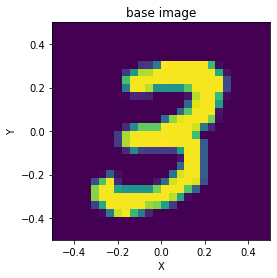

In [4]:
# img_path = 'call.png'
# base_img = Image.open(img_path)
# img_gray = base_img.convert('L')
# base_img = np.array(img_gray)

(imgs, labels), (_,_) = mnist.load_data()
base_img = imgs[7]

raw_height, raw_width = base_img.shape

# padding in terms of matrix size / raw image coordinates
pad_x = 10
pad_y = 10
base_img_nopad = base_img
base_img = pad_image(base_img, pad_x, pad_y)

# Ratio matrix rows : Euclidean horizontal distance
scale_x = 1 / raw_width

# Ratio matrix cols : Euclidean vertical distance
scale_y = 1 / raw_height

extent = [-.5,.5,-.5,.5]

base_domain, base_measure = img_to_points_and_measure(base_img)

fig, ax1 = plt.subplots(nrows = 1, ncols = 1)

fig.subplots_adjust(wspace = .5)

ax1.set_title('base image')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

ax1.imshow(base_img_nopad, extent=extent, origin='upper')

In [1]:
"""
Inputs:
- base_img    : base image to transform
- params      : list of transformation parameters, in this case, every element
                of 'params' be a single rotation parameter
Outputs:
- list of 3-tuples (transformed, dom, meas) where:
  . 'transformed' is the base image transformed by a tuple of Euclidean group parameters
  . 'meas' is the empirical measure (histogram) on the trasformed image
  . 'dom' is the support of the measure measure above
"""
def get_transforms_so2(base_img, params):
    transforms = []
    for param in params:
        r = param
        T = np.float64([[np.cos(r),-np.sin(r),0],
                        [np.sin(r),np.cos(r),0],
                        [0,0,1]])
        transformed = get_affine_transformed_img(base_img, T)
        dom, meas = img_to_points_and_measure(transformed)
        transforms.append((transformed, dom, meas))
    return transforms


"""
Inputs:
- base_img    : base image to transform
- params      : list of transformation parameters, in this case, every element of 'params' ought to
                be a single element representing the maximum operator norm of the matrix.
                Then, a random invertible matrix with operator norm at most this parameter
                will be generated.
Outputs:
- list of 3-tuples (transformed, dom, meas) where:
  . 'transformed' is the base image transformed by a tuple of Euclidean group parameters
  . 'meas' is the empirical measure (histogram) on the trasformed image
  . 'dom' is the support of the measure measure above
"""
def get_transforms_gl2(base_img, params):
    transforms = []
    for param in params:
        a = np.random.uniform(-1,1)
        b = np.random.uniform(-1,1)
        c = np.random.uniform(-1,1)
        d = np.random.uniform(-1,1)
        while d is (b * c) / a:
            d = np.random.uniform(-1,1)
        A = np.array([[a, b],[c, d]])
        singular_values = np.linalg.svd(A, compute_uv=False)
        operator_norm = singular_values[0]  # Largest singular value 
        A = np.eye(2) + (param / operator_norm) * A
        T = np.float64([[A[0,0],A[0,1],0],
                        [A[1,0],A[1,1],0],
                        [0,0,1]])
        transformed = get_affine_transformed_img(base_img, T)
        dom, meas = img_to_points_and_measure(transformed)
        transforms.append((transformed, dom, meas))
    return transforms


"""
Inputs:
- base_img    : base image to transform
- params      : list of transformation parameters, in this case, every element of 'params'
                should be a 3-tuple of rotation, translation along x-axis, and translation along y-axis
Outputs:
- list of 3-tuples (transformed, dom, meas) where:
  . 'transformed' is the base image transformed by a tuple of Euclidean group parameters
  . 'meas' is the empirical measure (histogram) on the trasformed image
  . 'dom' is the support of the measure measure above
"""
def get_transforms_e2(base_img, params):
    transforms = []
    for param in params:
        r, tx, ty = param
        T = np.float64([[np.cos(r),-np.sin(r),tx],
                        [np.sin(r),np.cos(r),ty],
                        [0,0,1]])
        transformed = get_affine_transformed_img(base_img, T)
        dom, meas = img_to_points_and_measure(transformed)
        transforms.append((transformed, dom, meas))
    return transforms


"""
Inputs:
- base_img    : base image to transform
- params      : list of transformation parameters, in this case, every element of 'params'
                should be a 2-tuple of translation along x-axis and translation along y-axis
Outputs:
- list of 3-tuples (transformed, dom, meas) where:
  . 'transformed' is the base image transformed by a tuple of Euclidean group parameters
  . 'meas' is the empirical measure (histogram) on the trasformed image
  . 'dom' is the support of the measure measure above
"""
def get_transforms_t2(base_img, params):
    transforms = []
    for param in params:
        tx, ty = param
        T = np.float64([[1,0,tx],
                        [0,1,ty],
                        [0,0,1]])
        transformed = get_affine_transformed_img(base_img, T)
        dom, meas = img_to_points_and_measure(transformed)
        transforms.append((transformed, dom, meas))
    return transforms

"""
Inputs:
- base_img    : base image to transform
- params      : list of transformation parameters, in this case, every element of 'params'
                should be a 2-tuple of scaling along x-axis and scaling along y-axis
Outputs:
- list of 3-tuples (transformed, dom, meas) where:
  . 'transformed' is the base image transformed by a tuple of Euclidean group parameters
  . 'meas' is the empirical measure (histogram) on the trasformed image
  . 'dom' is the support of the measure measure above
"""
def get_transforms_d2(base_img, params):
    transforms = []
    for param in params:
        tx, ty = param
        T = np.float64([[tx,0,0],
                        [0,ty,0],
                        [0,0,1]])
        transformed = get_affine_transformed_img(base_img, T)
        dom, meas = img_to_points_and_measure(transformed)
        transforms.append((transformed, dom, meas))
    return transforms

Now that we can generate rotated images and their measures, we can perform the eigenvalue experiments. In the cells below, the eigenvalues are computed, and in the next cell, the obtained results are plotted.

In [6]:
"""
Given a list of parameters and a method which takes these parameters and outputs a set
of trasnformed images, domains, and measures, determine the eigenvalues of the empirical span operator
corresponding to the diplacement vector fields generated by these transformations.
Returns lists dipslaying how the eigenvalues evolve over time.
Note: this can take a while to compute.
"""
def eigenvalue_experiment(base_img, transformation_method, params):
    eigvecs, eigs, reps = [], [], []
    for param in params:
        (_, domains, measures) = zip(*transformation_method(base_img, param))
        U, svals, W, _ = wasserstein_tangent_space(base_measure, base_domain, measures, domains, knn = False, sinkhorn = False, epsilon = 1e-3)
        eigvecs.append(U)
        eigs.append(svals**2)
        reps.append(W)
    return eigvecs, tuple(zip(*eigs)), reps

In [126]:
t_0 = 0.005
t_1 = np.pi
ts = np.linspace(t_0, t_1, 50)
eigvecs, eigs, reps = eigenvalue_experiment(base_img, get_transforms_so2, [[t, -t] for t in ts])

In [247]:
t_0 = 0.2
t_1 = 1
ts = np.linspace(t_0, t_1, 20)
eigvecs, eigs, reps = eigenvalue_experiment(base_img, get_transforms_gl2, [9 * [t] for t in ts])

In [214]:
def params_from_time(t):
    p1 = (t*np.pi, 0, 0.2*t)
    p2 = (-0.3*t, t, 0)
    p4 = (0, t, -t)
    p5 = (t*np.pi, 2*t, -t)
    p6 = (-t*np.pi, -t, -t)
    p7 = (-t*np.pi, t, -t)
    p3 = (0, -t, t)
    p7 = (-t, t, -t)
    p8 = (2*t*np.pi, t, 0)
    p9 = (-t*np.pi, t, 0)
    return [p1, p2, p3, p4, p5, p6, p7, p8, p9]

def params_from_time_2(t):
    p1 = (0.5*np.pi*t, 0, 0)
    p2 = (0, t, 0)
    p3 = (0, 0, t)
    return [p1, p2, p3]

t_0 = 0.005
t_1 = 1
ts = np.linspace(t_0, t_1, 10)

eigvecs, eigs, reps = eigenvalue_experiment(base_img, get_transforms_e2, [params_from_time(t) for t in ts])

In [205]:
def params_from_time(t):
    p1 = (-0.1*t, 0.2*t)
    p2 = (0.5*t, -2*t)
    p4 = (t, -t)
    p5 = (2*t, -t)
    p6 = (-t, -t)
    p7 = (t, -t)
    p3 = (-t, t)
    p7 = (t, -t)
    p8 = (t, 0.2*t)
    p9 = (t, -t)
    return [p1, p2, p3, p4, p5, p6, p7, p8, p9]

t_0 = 0.0005
t_1 = 1
ts = np.linspace(t_0, t_1, 20)

eigvecs, eigs, reps = eigenvalue_experiment(base_img, get_transforms_t2, [params_from_time(t) for t in ts])

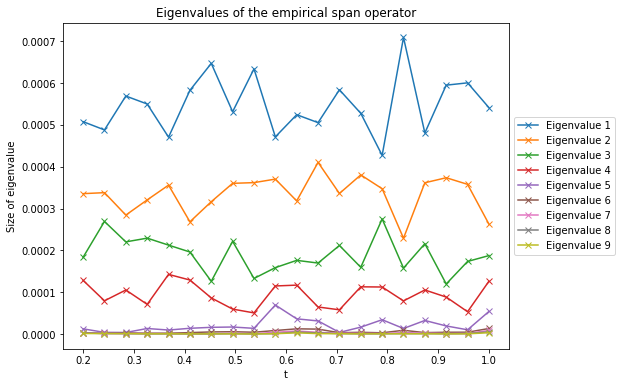

In [248]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))
for i, eig in enumerate(eigs):
    ax.plot(ts, eig, marker = 'x', label=f'Eigenvalue {i+1}')

ax.set_xlabel('t')
ax.set_ylabel('Size of eigenvalue')
ax.set_title("Eigenvalues of the empirical span operator")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

It might also be interesting to study the eigenvectors of the empirical span operators. What kind of vector fields do they represent?

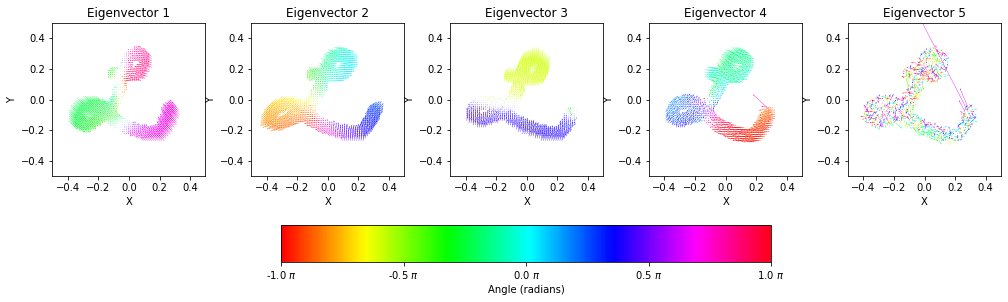

In [252]:
def eigenvector_to_displacement(v, meas):
    return np.array([v[2*i:2*(i+1)] for i, density in enumerate(meas)])


U = eigvecs[1] # Eigenvectors for relatively small transformations
vec = U[:,1] # Top eigenvector

num_eigenvectors = min(5,len(U[0,:]))

fig, axs = plt.subplots(nrows = 1, ncols = num_eigenvectors, figsize = (17,17))
fig.subplots_adjust(wspace = 0.3)
cmap = plt.cm.hsv
for i, ax in enumerate(axs):
    ax.set_xlim([-.5,.5])
    ax.set_ylim([-.5,.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ax.set_title(f'Eigenvector {i+1}')
    displacement = eigenvector_to_displacement(U[:,i], base_measure)
    u = displacement[:,0]
    v = displacement[:,1]
    angles = np.arctan2(v, u)
    normalized_angles = (angles + np.pi) / (2 * np.pi)
    quiv = ax.quiver(base_domain[:,0], base_domain[:,1],u,v,color=cmap(normalized_angles), angles='xy', scale_units='xy', scale=1)

cbar_ax = plt.gcf().add_axes([0.312, 0.37, 0.4, 0.03])
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), cax=cbar_ax, orientation='horizontal')
cb.set_ticks(np.linspace(0, 1, 5)) 
cb.set_label('Angle (radians)')
cb.set_ticklabels([f'{(angle / np.pi - 1)} $\pi$' for angle in np.linspace(0, 2*np.pi, 5)])
plt.set_cmap('plasma')
plt.show()

We will now experiment with using Wasserstein tangent space approximation as a method of linear manifold learning in Wasserstein space. We will first apply this to data sampled from regular Wasserstein submanifolds, and later it to MNIST data and compare it to ordinary PCA.

In [7]:
params_d2 = [(np.random.uniform(0.5,1.5),np.random.uniform(0.5,1.5)) for _ in range(2000)]
transforms_d2, domains, measures = zip(*get_transforms_d2(base_img, params_d2))

In [171]:
params_so2 = [np.random.uniform(0,2*np.pi) for _ in range(2000)]
transforms_so2, domains, measures = zip(*get_transforms_so2(base_img, params_so2))

Below is a method for computing the Wasserstein barycenter of a set of images. This is required for linear manifold learning.

In [15]:
def get_barycenter_from_imgs(imgs, sample_size = None):
    if sample_size is None:
        sample_size = len(imgs)
    barycenter_imgs = imgs[:sample_size]

    # Computation of Wasserstein barycenters with POT only works for measure
    # defined on the same support.
    b_domains, b_measures = imgs_to_points_and_measures(barycenter_imgs, full_support = True)
    cost = ot.dist(b_domains[0], b_domains[1])
    A = np.zeros(shape=(len(b_measures[0]), len(b_measures)))
    for i, measure in enumerate(b_measures):
        A[:,i] = measure

    weights = [1 / len(barycenter_imgs)] * len(barycenter_imgs)
    barycenter = ot.bregman.barycenter(A, cost, 1e-3, weights)

    threshold = 1e-3
    barycenter[barycenter < threshold] = 0 # Remove tiny values
    barycenter = barycenter / np.sum(barycenter) # Renormalize
   
    sq = int(np.sqrt((barycenter.shape)[0]))
    mat = barycenter.reshape(sq, sq)
    plt.imshow(mat) # Plot barycenter
    mat = pad_image(mat, pad_x, pad_y) # Nonsensical hacky stuff
    return img_to_points_and_measure(mat)

In [8]:
# Barycenter for d2 transforms
experiment_imgs = transforms_d2
barycenter_domain, barycenter = img_to_points_and_measure(base_img, full_support = False) 

In [61]:
# Barycenter for so2 transforms
experiment_imgs = transforms_so2
barycenter_domain, barycenter = img_to_points_and_measure(base_img, full_support = False)

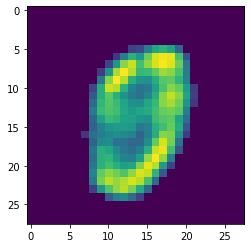

In [23]:
# Barycenter computation for MNIST
n_digits = 6000
experiment_imgs = imgs[:n_digits]
experiment_labels = labels[:n_digits]
domains, measures = imgs_to_points_and_measures(experiment_imgs, full_support = False)
barycenter_domain, barycenter = get_barycenter_from_imgs(experiment_imgs, 100)

We now perform tangent space recovery with the computed barycenter as the reference measure.

In [24]:
U, svals, W, _ = wasserstein_tangent_space(barycenter, barycenter_domain, measures, domains, knn = False, sinkhorn = False)

In [25]:
d = 2
A = (experiment_imgs.reshape(n_digits, 28 * 28)).T # Matrix rep of MNIST data
U_pca, svals_pca, _ = np.linalg.svd(A, compute_uv = True)
x_pca, y_pca = (U_pca[:,:d]).T @ A
x, y = (U[:,:d]).T @ W

In [11]:
d = 2
x, y = (U[:,:d]).T @ W

sq = (base_img.shape)[0]
A = np.empty((int(sq**2), len(experiment_imgs)))
for i, mat in enumerate(experiment_imgs):
    A[:, i] = mat.flatten()

U_pca, svals_pca, _ = np.linalg.svd(A, compute_uv = True)
x_pca, y_pca = (U_pca[:,:d]).T @ A

[]

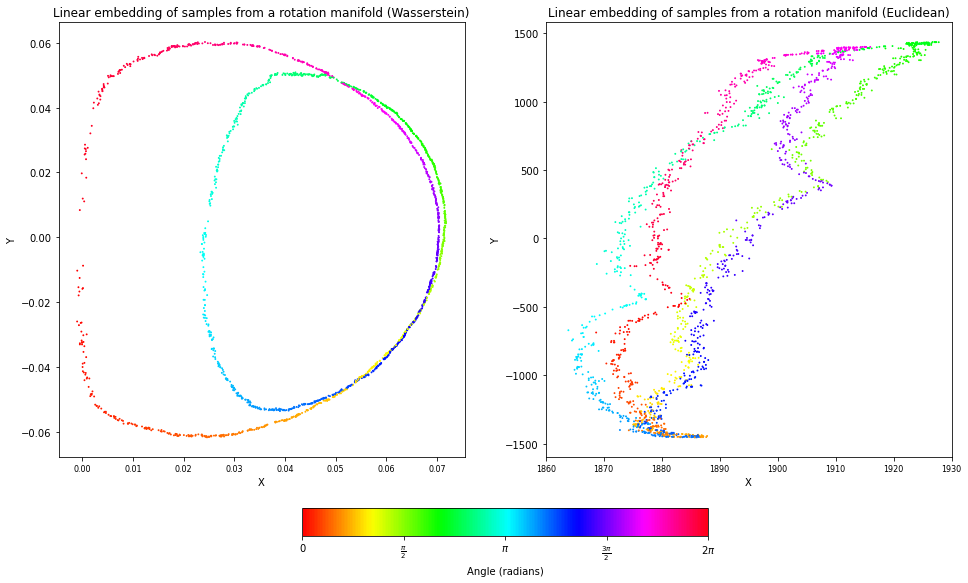

In [109]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
for ax in axs:
    ax.tick_params(axis='x', labelsize=8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
ax1, ax2 = axs
scatter1 = ax1.scatter(x, y, c = params_so2, cmap='hsv', s = .8)

cax1 = inset_axes(ax1, width="1000%", height="-5%", loc='center', bbox_to_anchor=(1.05, 0.5, 0.1, -1.3), bbox_transform=ax1.transAxes)
cbar1 = fig.colorbar(scatter1, cax=cax1, orientation='horizontal')
cbar1.set_label('Angle (radians)')
cbar1.set_ticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
cbar1.set_ticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

ax1.set_title(f'Linear embedding of samples from a rotation manifold (Wasserstein)')
scatter2 = ax2.scatter(x_pca, y_pca, s = .8, c = params_so2, cmap = 'hsv')

ax2.set_title(f'Linear embedding of samples from a rotation manifold (Euclidean)')
ax2.set_xlim(1860,1930)
ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.plot()

[]

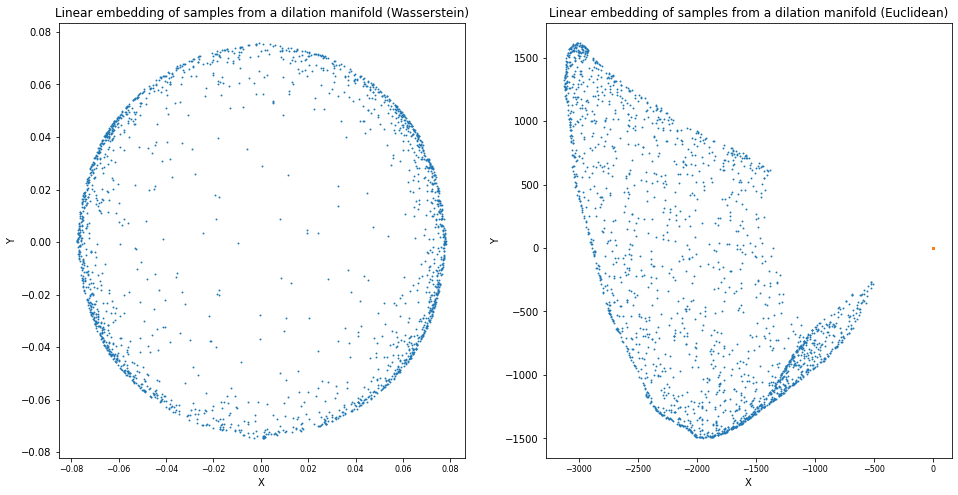

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
for ax in axs:
    ax.tick_params(axis='x', labelsize=8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
ax1, ax2 = axs
ax1.scatter(x, y, s = .8)
ax1.set_title(f'Linear embedding of samples from a dilation manifold (Wasserstein)')
ax2.scatter(x_pca, y_pca, s = .8)
ax2.set_title(f'Linear embedding of samples from a dilation manifold (Euclidean)')

ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.scatter(x, y, s = .8)

plt.plot()

Text(0.5, 1.0, 'Linear embedding of first 6000 MNIST images (Euclidean)')

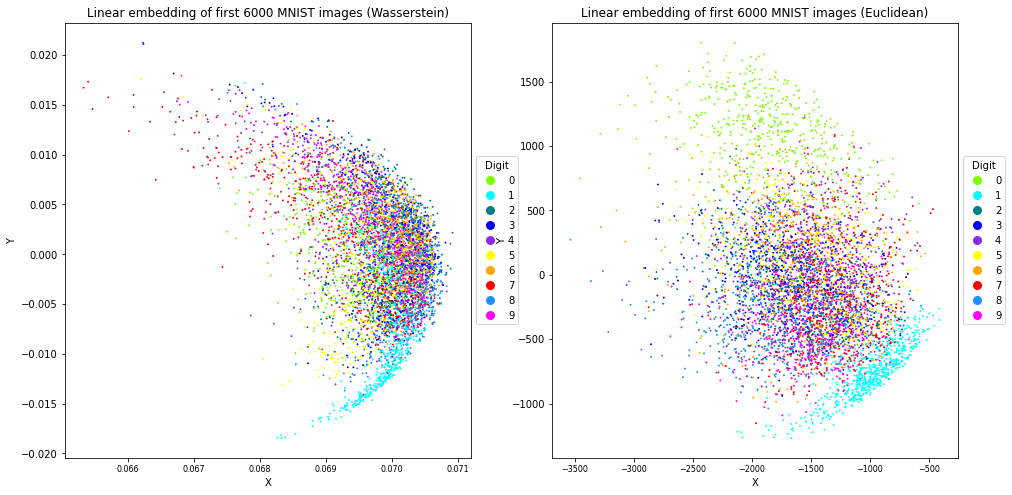

In [26]:
colors = ['lawngreen', 'cyan', 'teal', 'blue', 'blueviolet', 'yellow', 'orange', 'red', 'dodgerblue', 'magenta', 'deeppink']

classes = [0,1,2,3,4,5,6,7,8,9]
class_labels = ['{}'.format(i) for i in range(10)]
unique_classes = np.unique(classes)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[cls], markersize=10) for cls in unique_classes]

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
for ax in axs:
    ax.legend(handles, [class_labels[cls] for cls in unique_classes], title='Digit', loc='center left', bbox_to_anchor=(1, 0.5))
    ax.tick_params(axis='x', labelsize=8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
ax1, ax2 = axs
ax1.scatter(x, y, s = .8, c = [colors[cls] for cls in experiment_labels])
ax1.set_title(f'Linear embedding of first {n_digits} MNIST images (Wasserstein)')
ax2.scatter(x_pca, y_pca, s = .8, c = [colors[cls] for cls in experiment_labels])
ax2.set_title(f'Linear embedding of first {n_digits} MNIST images (Euclidean)')

We will now test the local tangent space alignment algorithm. First, we apply Euclidean LTSA to the MNIST dataset.

In [113]:
n = 500
k = 20
d = 2

params_so2 = [np.random.uniform(0,2*np.pi) for _ in range(n)]
transforms_so2, domains, measures = zip(*get_transforms_so2(base_img, params_so2))
experiment_imgs = transforms_so2

In [32]:
n = 500
k = 20
d = 2

params_d2 = [(np.random.uniform(0.5,1.5),np.random.uniform(0.5,1.5)) for _ in range(n)]
transforms_d2, domains, measures = zip(*get_transforms_d2(base_img, params_d2))
experiment_imgs = transforms_d2

In [33]:
import numpy.matlib
from sklearn.manifold import LocallyLinearEmbedding

# Euclidean LTSA
sq = (base_img.shape)[0]
A = np.empty((len(experiment_imgs), int(sq**2)))
for i, mat in enumerate(experiment_imgs):
    A[i, :] = mat.flatten()

manifold = LTSA(A, k, d)
manifold.solve()
x, y = zip(*manifold.t)

In [39]:
# Wasserstein LTSA: compute local coordinates
measures = list(measures)
domains = list(domains)
transforms_d2 = np.array(transforms_d2)

theta = np.zeros((n, d, k))
theta_pinv = np.zeros((n, k, d))
neighborhoods = np.zeros((n,k))
for i, (base_measure, base_domain) in enumerate(zip(measures, domains)):
    Qi, _, W, neighbors = wasserstein_tangent_space(base_measure, base_domain, measures, domains, k, base_idx = i)
    theta[i,:,:] = (Qi[:,:d]).T @ W
    theta_pinv[i,:,:] = np.linalg.pinv(np.squeeze(theta[i,:,:]))
    neighborhoods[i,:] = neighbors
    print(f"Progress: {i + 1} / {n} local coordinates computed")

Progress: 1 / 500 local coordinates computed
Progress: 2 / 500 local coordinates computed
Progress: 3 / 500 local coordinates computed
Progress: 4 / 500 local coordinates computed
Progress: 5 / 500 local coordinates computed
Progress: 6 / 500 local coordinates computed
Progress: 7 / 500 local coordinates computed
Progress: 8 / 500 local coordinates computed
Progress: 9 / 500 local coordinates computed
Progress: 10 / 500 local coordinates computed
Progress: 11 / 500 local coordinates computed
Progress: 12 / 500 local coordinates computed
Progress: 13 / 500 local coordinates computed
Progress: 14 / 500 local coordinates computed
Progress: 15 / 500 local coordinates computed
Progress: 16 / 500 local coordinates computed
Progress: 17 / 500 local coordinates computed
Progress: 18 / 500 local coordinates computed
Progress: 19 / 500 local coordinates computed
Progress: 20 / 500 local coordinates computed
Progress: 21 / 500 local coordinates computed
Progress: 22 / 500 local coordinates comput

Progress: 178 / 500 local coordinates computed
Progress: 179 / 500 local coordinates computed
Progress: 180 / 500 local coordinates computed
Progress: 181 / 500 local coordinates computed
Progress: 182 / 500 local coordinates computed
Progress: 183 / 500 local coordinates computed
Progress: 184 / 500 local coordinates computed
Progress: 185 / 500 local coordinates computed
Progress: 186 / 500 local coordinates computed
Progress: 187 / 500 local coordinates computed
Progress: 188 / 500 local coordinates computed
Progress: 189 / 500 local coordinates computed
Progress: 190 / 500 local coordinates computed
Progress: 191 / 500 local coordinates computed
Progress: 192 / 500 local coordinates computed
Progress: 193 / 500 local coordinates computed
Progress: 194 / 500 local coordinates computed
Progress: 195 / 500 local coordinates computed
Progress: 196 / 500 local coordinates computed
Progress: 197 / 500 local coordinates computed
Progress: 198 / 500 local coordinates computed
Progress: 199

Progress: 353 / 500 local coordinates computed
Progress: 354 / 500 local coordinates computed
Progress: 355 / 500 local coordinates computed
Progress: 356 / 500 local coordinates computed
Progress: 357 / 500 local coordinates computed
Progress: 358 / 500 local coordinates computed
Progress: 359 / 500 local coordinates computed
Progress: 360 / 500 local coordinates computed
Progress: 361 / 500 local coordinates computed
Progress: 362 / 500 local coordinates computed
Progress: 363 / 500 local coordinates computed
Progress: 364 / 500 local coordinates computed
Progress: 365 / 500 local coordinates computed
Progress: 366 / 500 local coordinates computed
Progress: 367 / 500 local coordinates computed
Progress: 368 / 500 local coordinates computed
Progress: 369 / 500 local coordinates computed
Progress: 370 / 500 local coordinates computed
Progress: 371 / 500 local coordinates computed
Progress: 372 / 500 local coordinates computed
Progress: 373 / 500 local coordinates computed
Progress: 374

In [40]:
# Wasserstein LTSA: perform Euclidean LTSA on the Wasserstein tangent spaces

neighborhoods = neighborhoods.astype(int)

X = np.zeros((n,)) # Hacky temporary stuff
manifold = LTSA(X, k, d, theta, theta_pinv, neighborhoods, skip_data = True)
manifold.solve()
x_wass, y_wass = zip(*manifold.t)

C:\Users\finnv\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


[]

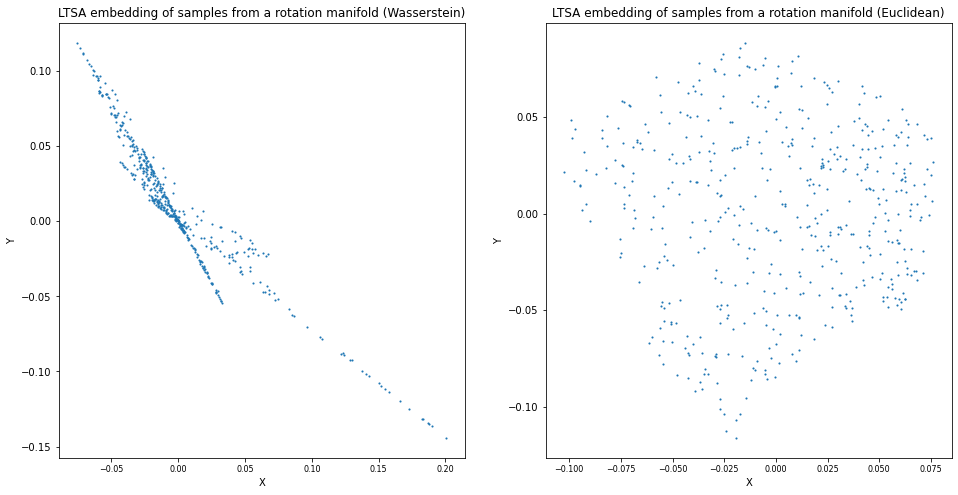

In [42]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (16,8))
for ax in axs:
    ax.tick_params(axis='x', labelsize=8)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
ax1, ax2 = axs
scatter1 = ax1.scatter(x_wass, y_wass, cmap='hsv', s = 1.2)

ax1.set_title(f'LTSA embedding of samples from a rotation manifold (Wasserstein)')
scatter2 = ax2.scatter(x, y, s = 1.2, cmap = 'hsv')

ax2.set_title(f'LTSA embedding of samples from a rotation manifold (Euclidean)')
# ax2.set_xlim(1860,1930)
ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.plot()

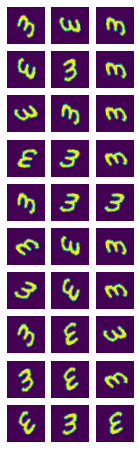

In [56]:
rotated_imgs = np.array(get_rotated_imgs(base_img,30))
plot_img_set(rotated_imgs,10,extent)

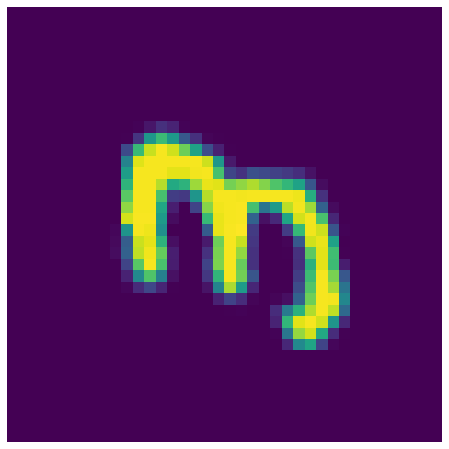

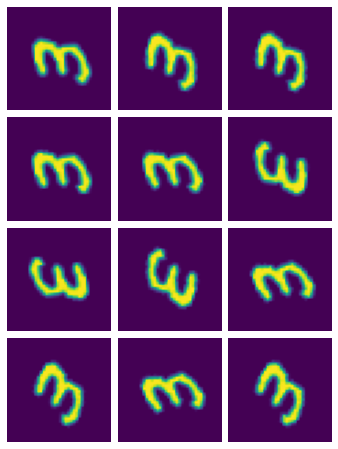

In [88]:
domains, measures = imgs_to_points_and_measures(rotated_imgs)

idx = 2
base_measure = measures.pop(idx)
base_domain = domains.pop(idx)

heap = []
data_dict = dict() # We assume that all Wasserstein distances are unique
for i, (other_measure, other_domain) in enumerate(zip(measures, domains)):
        cost = ot.dist(base_domain, other_domain)
        transport_map = ot.emd(base_measure, other_measure, cost)
        dist = np.sum(transport_map * cost) # Compute Wasserstein distance
        data_dict.update({dist : (i if i < idx else i + 1, transport_map)})
        heapq.heappush(heap, dist)
k_nearest = heapq.nsmallest(k, heap)
idxs, transport_maps, dists = tuple(map(list, zip(*[(data_dict[dist][0], data_dict[dist][1], dist) for dist in k_nearest])))
        
nearest_neighbor_images = rotated_imgs[idxs]
plot_img_set([rotated_imgs[idx]],1,extent)
plot_img_set(nearest_neighbor_images,4,extent)
